# Project 1- Performance Analysis & Recommendation

## Part 2- Recommendation
### A potential investor has approached you looking for a portfolio recommendation. He's been looking at the overall market performance and wants to know if his profile is better suited for a diversified portfolio across industries and sectors or is he better off focusing on one industry. Based on his interests, the industry he had in mind is the Airline Industry. What is your recommendation?

In [53]:
# Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import hvplot.pandas

%matplotlib inline

In [54]:
from dotenv import load_dotenv

In [55]:
cd /Users/tendayijanetmushava/Desktop/FinTech/Lessons/APIs

/Users/tendayijanetmushava/Desktop/FinTech/Lessons/APIs


In [56]:
ls -a

./                  .env                InvValue.ipynb      alpaca-demo.ipynb
../                 .ipynb_checkpoints/ Untitled.ipynb


In [57]:
import os 
import requests 
import dotenv

In [58]:
load_dotenv()

True

In [59]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

In [60]:
alpaca_api_key

'PK5V0IHW195AV4UDZNE6'

In [61]:
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [62]:
alpaca_secret_key

'WVpc99elvauQITP8YviJ9KEzVA0ArBag0e6B2hZk'

In [63]:
load_dotenv()

True

In [64]:
# Install alpaca trade api
pip install alpaca_trade_api

SyntaxError: invalid syntax (<ipython-input-64-c796f9ee611f>, line 2)

In [65]:
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [66]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [67]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between 3/1/20 and 3/1/21.
start_date = pd.Timestamp("2020-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SPY","XLI","JETS"]

# Get historical price data
df_combined= alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_combined.head()

JETS                                     SPY  \
                            open   high    low  close     volume    open   
time                                                                       
2020-03-02 00:00:00-05:00  23.82  23.83  22.68  23.76   439835.0  298.21   
2020-03-03 00:00:00-05:00  24.46  24.75  23.13  23.24   559775.0  309.50   
2020-03-04 00:00:00-05:00  23.64  23.87  22.82  23.81   402896.0  306.07   
2020-03-05 00:00:00-05:00  23.08  23.08  21.60  21.67  1493775.0  304.98   
2020-03-06 00:00:00-05:00  21.09  22.47  20.77  21.92  4743644.0  293.15   

                                                                XLI         \
                             high     low   close     volume   open   high   
time                                                                         
2020-03-02 00:00:00-05:00  309.16  294.46  309.08  194044941  73.95  75.83   
2020-03-03 00:00:00-05:00  313.84  297.57  300.34  260375913  75.85  77.53   
2020-03-04 00:00:00-05:00  313.10  303.33  312.91  139586206  74.96  76.95   
2020-03-05 00:00:00-05:00  308.47  300.01  302.51  153297506  74.67  75.22   
2020-03-06 00:00:00-05:00  298.78  290.23  297.42  189077823  70.66  72.74   

                                                   
                             low  close    volume  
time                                               
2020-03-02 00:00:00-05:00  72.59  75.64  40040405  
2020-03-03 00:00:00-05:00  73.35  73.77  46411607  
2020-03-04 00:00:00-05:00  74.26  76.84  26377982  
2020-03-05 00:00:00-05:00  72.77  73.08  34059996  
2020-03-06 00:00:00-05:00  70.45  72.44  73341418

### Based on the investor's profile, configure a Monte Carlo simulation to forecast 10 years cumulative returns with equal weights

In [68]:
MC_10yr_equal = MCSimulation(
    portfolio_data = df_combined,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252
)

# Print the simulation input data
MC_10yr_equal.portfolio_data.head()

JETS                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2020-03-02 00:00:00-05:00  23.82  23.83  22.68  23.76   439835.0          NaN   
2020-03-03 00:00:00-05:00  24.46  24.75  23.13  23.24   559775.0    -0.021886   
2020-03-04 00:00:00-05:00  23.64  23.87  22.82  23.81   402896.0     0.024527   
2020-03-05 00:00:00-05:00  23.08  23.08  21.60  21.67  1493775.0    -0.089878   
2020-03-06 00:00:00-05:00  21.09  22.47  20.77  21.92  4743644.0     0.011537   

                              SPY                                     \
                             open    high     low   close     volume   
time                                                                   
2020-03-02 00:00:00-05:00  298.21  309.16  294.46  309.08  194044941   
2020-03-03 00:00:00-05:00  309.50  313.84  297.57  300.34  260375913   
2020-03-04 00:00:00-05:00  306.07  313.10  303.33  312.91  139586206   
2020-03-05 00:00:00-05:00  304.98  308.47  300.01  302.51  153297506   
2020-03-06 00:00:00-05:00  293.15  298.78  290.23  297.42  189077823   

                                          XLI                                 \
                          daily_return   open   high    low  close    volume   
time                                                                           
2020-03-02 00:00:00-05:00          NaN  73.95  75.83  72.59  75.64  40040405   
2020-03-03 00:00:00-05:00    -0.028277  75.85  77.53  73.35  73.77  46411607   
2020-03-04 00:00:00-05:00     0.041853  74.96  76.95  74.26  76.84  26377982   
2020-03-05 00:00:00-05:00    -0.033236  74.67  75.22  72.77  73.08  34059996   
2020-03-06 00:00:00-05:00    -0.016826  70.66  72.74  70.45  72.44  73341418   

                                        
                          daily_return  
time                                    
2020-03-02 00:00:00-05:00          NaN  
2020-03-03 00:00:00-05:00    -0.024722  
2020-03-04 00:00:00-05:00     0.041616  
2020-03-05 00:00:00-05:00    -0.048933  
2020-03-06 00:00:00-05:00    -0.008758

In [69]:
MC_10yr_equal.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979884,0.990733,0.982739,0.979580,1.018733,1.029620,0.995160,1.014352,0.993528,0.997005,...,0.968615,1.009476,1.020319,0.994944,1.015488,1.002494,0.972371,1.018441,0.996263,1.005247
2,0.948201,1.004148,0.999681,0.981544,1.018457,1.023341,0.997993,1.037440,1.004985,1.007159,...,0.964286,1.032531,1.042024,0.999006,1.022005,1.001721,0.963649,1.009411,1.010142,1.006255
3,0.943243,0.961164,1.006875,0.972621,0.971907,1.041799,0.977967,1.042122,1.017970,0.993910,...,0.957540,1.051281,1.015115,0.996133,1.026706,1.004174,0.977075,0.979871,1.006366,1.008462
4,0.934473,0.955508,1.021031,0.986214,0.971888,1.065014,0.991885,1.060743,1.013321,0.989064,...,0.951524,1.073586,0.972508,1.004456,1.043968,0.990072,1.000488,0.968984,1.001822,0.986294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.143880,1.084196,1.394538,0.762968,1.577659,1.852559,1.052291,0.981085,1.474496,1.630640,...,1.259329,1.203346,1.775854,1.203765,1.510014,0.805460,1.275561,1.635991,1.245718,0.809255
249,1.146180,1.078674,1.439661,0.748547,1.645814,1.868828,1.044059,0.961394,1.444896,1.659618,...,1.257495,1.181445,1.761989,1.210202,1.530385,0.782343,1.267069,1.628612,1.250347,0.812821
250,1.169554,1.077798,1.425413,0.768869,1.668034,1.871909,1.058114,0.982524,1.479660,1.649288,...,1.218227,1.133728,1.752144,1.198845,1.513397,0.751419,1.234865,1.637676,1.266391,0.790674
251,1.188259,1.083678,1.458033,0.760184,1.653721,1.767280,1.082102,0.973852,1.499800,1.613333,...,1.193921,1.138395,1.735864,1.232294,1.500876,0.734866,1.230346,1.617767,1.240028,0.782972


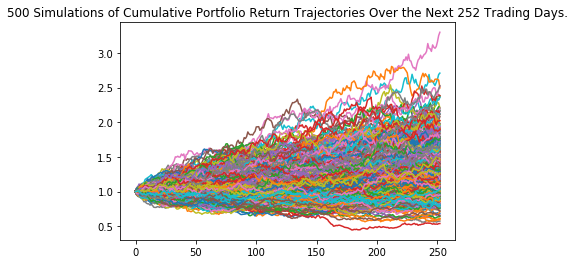

In [70]:
# Plot simulation outcomes
Line_Plot_equal= MC_10yr_equal.plot_simulation()

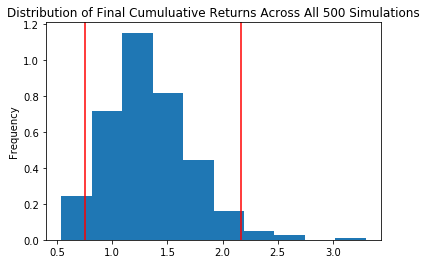

In [71]:
# Plot probability distribution and confidence intervals
Distribution_Plot_equal = MC_10yr_equal.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation returns with equal weights
Summary_Stats_equal = MC_10yr_equal.summarize_cumulative_return()

# Print summary statistics
print(Summary_Stats_equal)

count           500.000000
mean              1.336173
std               0.376481
min               0.539468
25%               1.081559
50%               1.291003
75%               1.556836
max               3.297682
95% CI Lower      0.755002
95% CI Upper      2.170809
Name: 252, dtype: float64


In [73]:
# Set initial investment
Initial_Investment_equal = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 100,000
ci_lower_equal = round((Summary_Stats_equal[8] * Initial_Investment_equal), 2)
ci_upper_equal = round((Summary_Stats_equal[9] * Initial_Investment_equal), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_equal} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_equal} and ${ci_upper_equal}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $75500.18 and $217080.86


### Based on the investor's profile, configure a Monte Carlo simulation to forecast 10 years cumulative returns with SPY

In [74]:
MC_10yr_SPY = MCSimulation(
    portfolio_data = df_combined,
    weights = [.1,.9,.1],
    num_simulation = 500,
    num_trading_days = 252
)

# Print the simulation input data
MC_10yr_SPY.portfolio_data.head()

JETS                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2020-03-02 00:00:00-05:00  23.82  23.83  22.68  23.76   439835.0          NaN   
2020-03-03 00:00:00-05:00  24.46  24.75  23.13  23.24   559775.0    -0.021886   
2020-03-04 00:00:00-05:00  23.64  23.87  22.82  23.81   402896.0     0.024527   
2020-03-05 00:00:00-05:00  23.08  23.08  21.60  21.67  1493775.0    -0.089878   
2020-03-06 00:00:00-05:00  21.09  22.47  20.77  21.92  4743644.0     0.011537   

                              SPY                                     \
                             open    high     low   close     volume   
time                                                                   
2020-03-02 00:00:00-05:00  298.21  309.16  294.46  309.08  194044941   
2020-03-03 00:00:00-05:00  309.50  313.84  297.57  300.34  260375913   
2020-03-04 00:00:00-05:00  306.07  313.10  303.33  312.91  139586206   
2020-03-05 00:00:00-05:00  304.98  308.47  300.01  302.51  153297506   
2020-03-06 00:00:00-05:00  293.15  298.78  290.23  297.42  189077823   

                                          XLI                                 \
                          daily_return   open   high    low  close    volume   
time                                                                           
2020-03-02 00:00:00-05:00          NaN  73.95  75.83  72.59  75.64  40040405   
2020-03-03 00:00:00-05:00    -0.028277  75.85  77.53  73.35  73.77  46411607   
2020-03-04 00:00:00-05:00     0.041853  74.96  76.95  74.26  76.84  26377982   
2020-03-05 00:00:00-05:00    -0.033236  74.67  75.22  72.77  73.08  34059996   
2020-03-06 00:00:00-05:00    -0.016826  70.66  72.74  70.45  72.44  73341418   

                                        
                          daily_return  
time                                    
2020-03-02 00:00:00-05:00          NaN  
2020-03-03 00:00:00-05:00    -0.024722  
2020-03-04 00:00:00-05:00     0.041616  
2020-03-05 00:00:00-05:00    -0.048933  
2020-03-06 00:00:00-05:00    -0.008758

In [75]:
MC_10yr_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016048,0.993497,0.974330,1.036737,0.986561,0.956594,0.990502,1.002386,0.997016,0.999180,...,0.983778,0.982283,0.985887,1.002532,0.991038,0.970635,1.006153,1.014028,1.016610,0.998674
2,1.039234,0.984553,0.957882,1.049510,1.004369,0.972239,0.997847,1.023864,0.999170,1.012220,...,0.973015,0.965394,1.007561,0.995454,0.970828,0.962458,1.014418,1.010150,1.039349,1.018040
3,1.090238,0.947527,0.955788,1.062366,0.991482,0.952721,0.999451,1.028816,1.015033,1.013629,...,0.961002,0.927470,1.024347,0.998148,0.979727,0.957428,0.997661,1.018271,1.023225,1.031354
4,1.065739,0.955089,0.951943,1.046648,0.963138,0.961137,0.996232,1.014970,1.033881,1.028565,...,0.976011,0.951067,1.015691,1.030285,0.955003,0.968056,1.028729,1.047308,1.024378,1.023837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.047079,1.727962,1.280820,2.497051,1.521348,1.219933,1.686220,1.148710,1.352427,1.141718,...,0.949019,1.090981,1.391423,1.378291,1.104975,1.671148,1.039140,1.960719,1.197094,1.577296
249,2.028989,1.748220,1.273210,2.539006,1.539380,1.187955,1.726534,1.149757,1.372671,1.157546,...,0.960439,1.080930,1.339345,1.389701,1.141498,1.707023,1.037432,1.989242,1.190332,1.542927
250,2.032768,1.736259,1.280143,2.653281,1.537302,1.214352,1.678220,1.180846,1.412445,1.179778,...,0.977403,1.060281,1.316798,1.411601,1.123261,1.752925,1.058536,1.952951,1.223130,1.539906
251,2.097852,1.732170,1.277916,2.585515,1.506852,1.180053,1.634314,1.227944,1.432017,1.176123,...,1.004656,1.079417,1.332349,1.444644,1.113283,1.730829,1.050534,1.908586,1.241631,1.576764


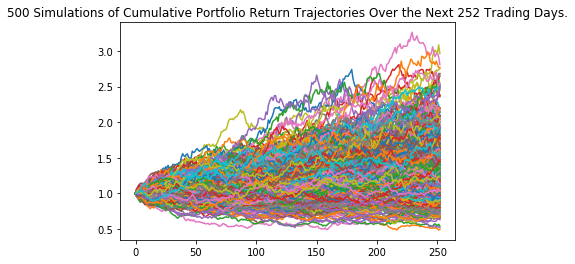

In [76]:
# Plot simulation outcomes
Line_Plot_SPY= MC_10yr_SPY.plot_simulation()

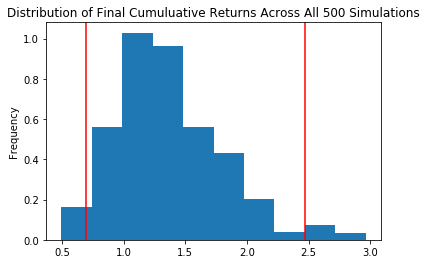

In [77]:
# Plot probability distribution and confidence intervals
Distribution_Plot_SPY = MC_10yr_SPY.plot_distribution()

In [78]:
# Fetch summary statistics from the Monte Carlo simulation returns with SPY
Summary_Stats_SPY = MC_10yr_SPY.summarize_cumulative_return()

# Print summary statistics
print(Summary_Stats_SPY)

count           500.000000
mean              1.371275
std               0.429144
min               0.495468
25%               1.062018
50%               1.302392
75%               1.623505
max               2.963699
95% CI Lower      0.695872
95% CI Upper      2.469562
Name: 252, dtype: float64


In [79]:
# Set initial investment
Initial_Investment_SPY = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 100,000
ci_lower_SPY = round((Summary_Stats_SPY[8] * Initial_Investment_SPY), 2)
ci_upper_SPY = round((Summary_Stats_SPY[9] * Initial_Investment_SPY), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_equal} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_SPY} and ${ci_upper_SPY}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $69587.2 and $246956.25


### Based on the investor's profile, configure a Monte Carlo simulation to forecast 10 years cumulative returns with JETS

In [80]:
MC_10yr_JETS = MCSimulation(
    portfolio_data = df_combined,
    weights = [.9,.1,.1],
    num_simulation = 500,
    num_trading_days = 252
)

# Print the simulation input data
MC_10yr_JETS.portfolio_data.head()

JETS                                               \
                            open   high    low  close     volume daily_return   
time                                                                            
2020-03-02 00:00:00-05:00  23.82  23.83  22.68  23.76   439835.0          NaN   
2020-03-03 00:00:00-05:00  24.46  24.75  23.13  23.24   559775.0    -0.021886   
2020-03-04 00:00:00-05:00  23.64  23.87  22.82  23.81   402896.0     0.024527   
2020-03-05 00:00:00-05:00  23.08  23.08  21.60  21.67  1493775.0    -0.089878   
2020-03-06 00:00:00-05:00  21.09  22.47  20.77  21.92  4743644.0     0.011537   

                              SPY                                     \
                             open    high     low   close     volume   
time                                                                   
2020-03-02 00:00:00-05:00  298.21  309.16  294.46  309.08  194044941   
2020-03-03 00:00:00-05:00  309.50  313.84  297.57  300.34  260375913   
2020-03-04 00:00:00-05:00  306.07  313.10  303.33  312.91  139586206   
2020-03-05 00:00:00-05:00  304.98  308.47  300.01  302.51  153297506   
2020-03-06 00:00:00-05:00  293.15  298.78  290.23  297.42  189077823   

                                          XLI                                 \
                          daily_return   open   high    low  close    volume   
time                                                                           
2020-03-02 00:00:00-05:00          NaN  73.95  75.83  72.59  75.64  40040405   
2020-03-03 00:00:00-05:00    -0.028277  75.85  77.53  73.35  73.77  46411607   
2020-03-04 00:00:00-05:00     0.041853  74.96  76.95  74.26  76.84  26377982   
2020-03-05 00:00:00-05:00    -0.033236  74.67  75.22  72.77  73.08  34059996   
2020-03-06 00:00:00-05:00    -0.016826  70.66  72.74  70.45  72.44  73341418   

                                        
                          daily_return  
time                                    
2020-03-02 00:00:00-05:00          NaN  
2020-03-03 00:00:00-05:00    -0.024722  
2020-03-04 00:00:00-05:00     0.041616  
2020-03-05 00:00:00-05:00    -0.048933  
2020-03-06 00:00:00-05:00    -0.008758

In [81]:
MC_10yr_JETS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982095,0.987177,1.005893,0.953425,0.964071,0.980627,1.031470,1.043385,0.959202,1.038795,...,0.986142,0.956791,0.980916,0.997400,0.999085,1.008150,1.006446,0.994310,1.013926,1.094306
2,0.969701,0.967242,0.968435,0.995463,0.955675,1.074620,1.007324,1.044962,0.940749,1.082918,...,0.983976,0.987656,1.005002,0.965762,1.012462,1.009803,0.940898,0.990417,1.008733,1.085015
3,0.966169,0.982409,0.929342,0.962530,0.949547,1.098279,1.034600,1.090840,0.953815,1.111284,...,0.971920,0.959468,0.995845,0.931672,0.948359,0.992328,0.949739,0.988492,1.010361,1.076266
4,0.968559,0.955090,0.914034,0.938224,0.919584,1.137953,1.102233,1.058951,0.924202,1.109372,...,0.939961,0.993950,0.972374,0.930727,0.926782,0.988714,0.942955,0.924226,0.931679,1.132541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.585416,1.664421,0.869940,1.926893,1.004028,2.329558,1.686053,0.960846,2.563746,1.406201,...,1.192890,0.890834,1.171937,1.276406,1.479357,0.665259,1.059230,0.894285,0.957938,0.781892
249,0.548311,1.685641,0.926407,1.864932,1.018667,2.366983,1.598312,0.981694,2.603193,1.382505,...,1.186987,0.861275,1.208718,1.245803,1.424901,0.655097,1.025246,0.935363,0.959579,0.778302
250,0.546354,1.790213,0.943850,1.767568,0.997672,2.378112,1.600578,1.002955,2.517777,1.331101,...,1.177156,0.836615,1.208386,1.200135,1.354063,0.653564,1.171395,0.945271,1.057389,0.783579
251,0.524708,1.681470,0.914063,1.794103,1.065243,2.233546,1.618249,1.035818,2.366690,1.341374,...,1.190398,0.885276,1.324352,1.180675,1.384599,0.613283,1.306084,0.996203,1.064005,0.775373


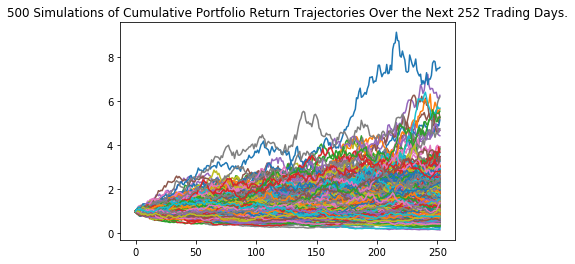

In [82]:
# Plot simulation outcomes
Line_Plot_JETS= MC_10yr_JETS.plot_simulation()

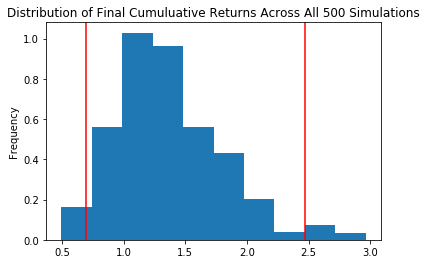

In [83]:
# Plot probability distribution and confidence intervals
Distribution_Plot_JETS = MC_10yr_SPY.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation returns with SPY
Summary_Stats_JETS = MC_10yr_JETS.summarize_cumulative_return()

# Print summary statistics
print(Summary_Stats_JETS)

count           500.000000
mean              1.495975
std               1.007263
min               0.161786
25%               0.839799
50%               1.215887
75%               1.808337
max               7.524913
95% CI Lower      0.410266
95% CI Upper      4.556163
Name: 252, dtype: float64


In [85]:
# Set initial investment
Initial_Investment_JETS = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our 100,000
ci_lower_JETS = round((Summary_Stats_JETS[8] * Initial_Investment_JETS), 2)
ci_upper_JETS = round((Summary_Stats_JETS[9] * Initial_Investment_JETS), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_JETS} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_JETS} and ${ci_upper_JETS}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $41026.57 and $455616.33


# Conclusion- Recommendation

**Investor Profile**
* Risk tolerance- low
* Age- 55
* Time horizon- 10 years
* Asset type- stocks
* Investment amount- $100,000

## 1. Summary

In [86]:
# Print Equal results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_equal} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_equal} and ${ci_upper_equal}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $75500.18 and $217080.86


### Equal Range = $136,159.86

In [87]:
# Print SPY results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_equal} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_SPY} and ${ci_upper_SPY}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $69587.2 and $246956.25


### SPY Range = $167,174.90

In [88]:
# Print JETS results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment_JETS} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_JETS} and ${ci_upper_JETS}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $41026.57 and $455616.33


### JETS Range = $321,176.95

## 2. Based on the results, give the potential investor your recommendation

After looking at all three simulations, the portfolio breakdown with the highest upside potential is the portfolio with a majority of JETS stock. However, I would not recommend this portfolio to the investor because it does not align with the investor’s profile. The investor has a low risk tolerance, and the JETS portfolio is both the riskiest and the most volatile portfolio out of all three. Also, based on the time horizon and age of the investor, it would not be prudent to make such a risky investment because assuming the worst-case scenario where the portfolio crashes, there is a limited time period to recoup losses. If the investor was younger with a higher risk tolerance, I would recommend the JETS portfolio but, in this case, I would recommend the evenly distributed portfolio. The upside potential is less than the JETS portfolio, but it has the least risk and the least volatility which aligns with the investor’s profile. 

Lastly, based on the simulations, it is also important to note how diversification plays a big role in investing. By investing across asset classes, markets, industries and sectors, an investor can hedge against market volatility as well as reduce the risk of the overall portfolio. While some investors may prefer to stick to one industry or asset class because it offers short term high returns, in the long term, a diversified portfolio will offer higher returns and peace of mind. Always remember that slow and steady wins the race! 